In [446]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [447]:
data=pd.read_csv("House Price India.csv")

In [448]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [449]:
data.tail()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14614,6762830250,42734,2,1.5,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.0,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.0,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.0,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14618,6762831463,42734,3,1.0,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [450]:
data.columns  

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [452]:
stats = data["Price"].describe().reset_index()
stats["Price"] = round(stats["Price"],2) 

In [453]:
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [454]:
data.isna().sum().sum()

np.int64(0)

In [455]:
data.duplicated().sum()

np.int64(0)

In [456]:
# for na values 
data.dropna(inplace=True)
#for duplicated values
data.drop_duplicates(inplace=True)

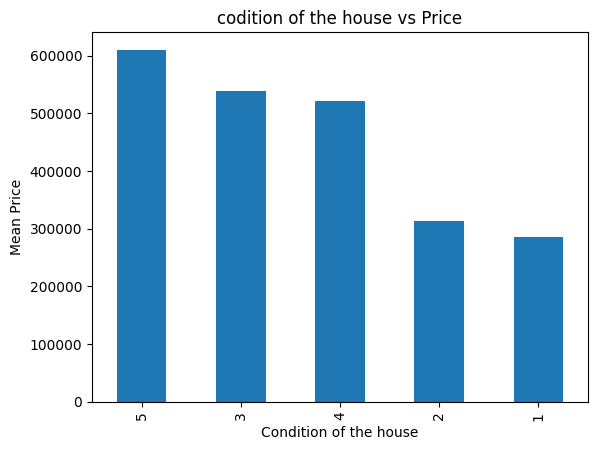

In [457]:
data.groupby("condition of the house")["Price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("codition of the house vs Price")
plt.ylabel("Mean Price")
plt.xlabel("Condition of the house")
plt.show()

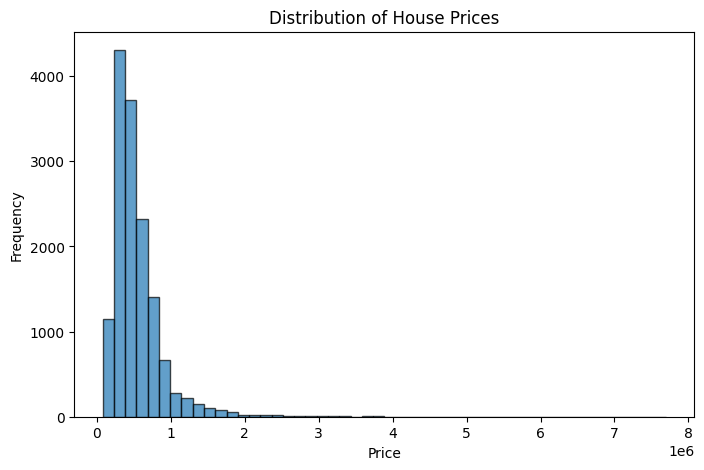

In [458]:
plt.figure(figsize=(8,5))
plt.hist(data['Price'], bins=50, edgecolor="black", alpha=0.7)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


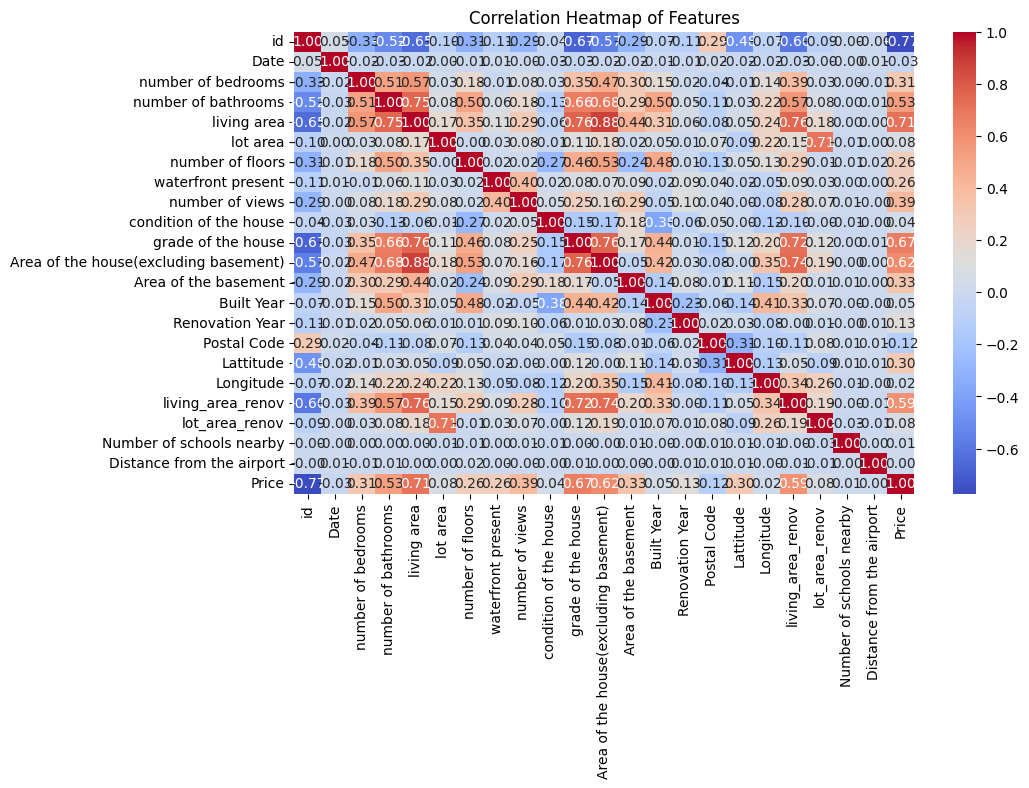

In [459]:


plt.figure(figsize=(10,6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


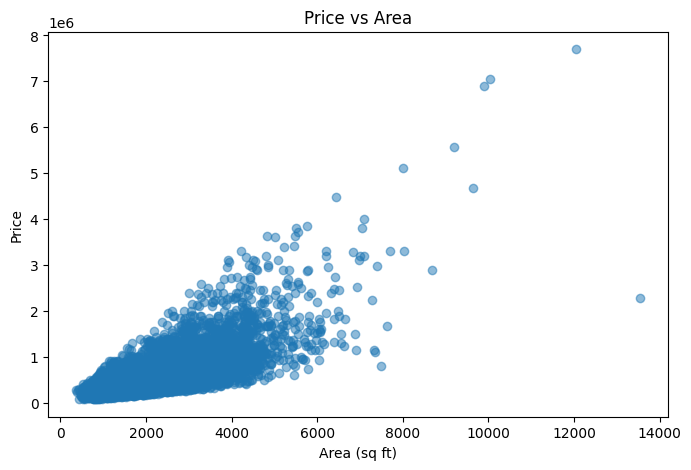

In [460]:
plt.figure(figsize=(8,5))
plt.scatter(data['living area'], data['Price'], alpha=0.5)
plt.title("Price vs Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.show()


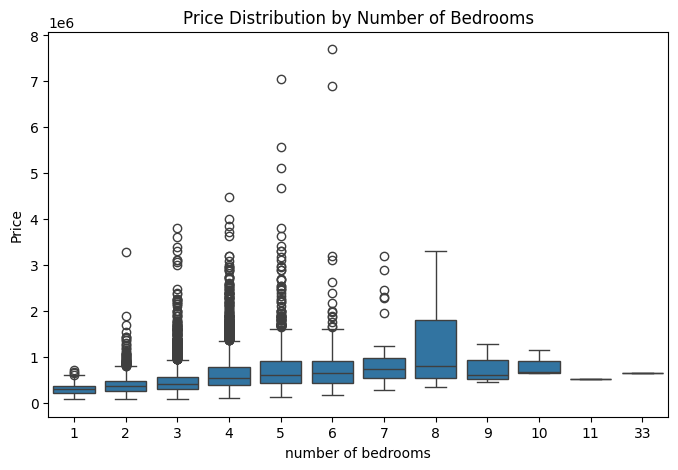

In [461]:
plt.figure(figsize=(8,5))
sns.boxplot(x="number of bedrooms", y="Price", data=data)
plt.title("Price Distribution by Number of Bedrooms")
plt.show()


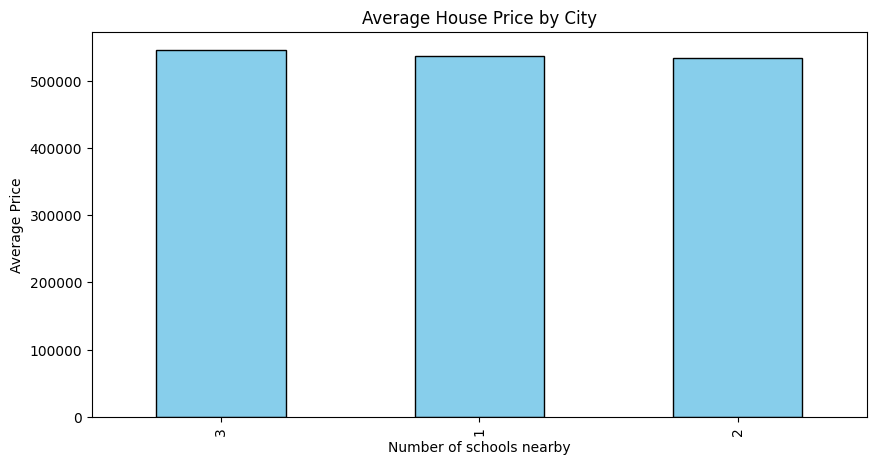

In [462]:
plt.figure(figsize=(10,5))
avg_price = data.groupby("Number of schools nearby")["Price"].mean().sort_values(ascending=False)
avg_price.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average House Price by City")
plt.ylabel("Average Price")
plt.show()


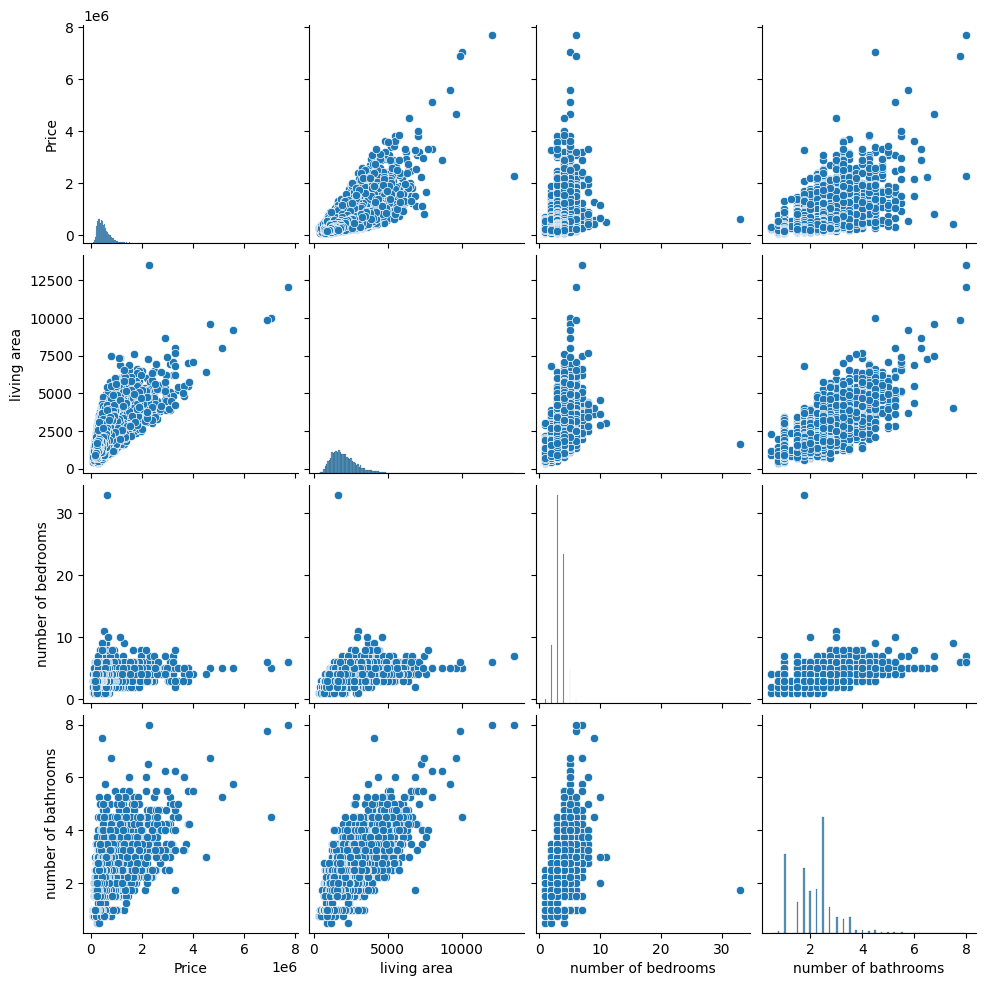

In [463]:
top_features = ['Price', 'living area', 'number of bedrooms', 'number of bathrooms']  # change if needed
sns.pairplot(data[top_features])
plt.show()


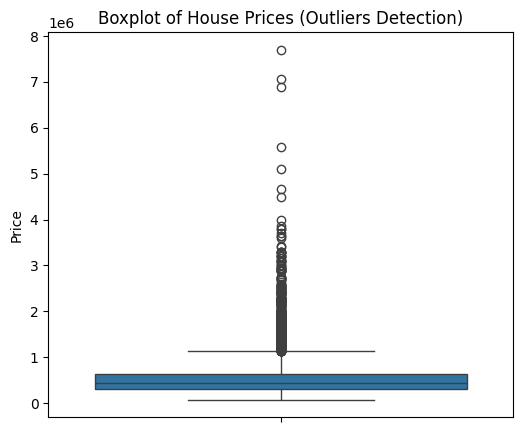

In [464]:
plt.figure(figsize=(6,5))
sns.boxplot(y=data['Price'])
plt.title("Boxplot of House Prices (Outliers Detection)")
plt.ylabel("Price")
plt.show()


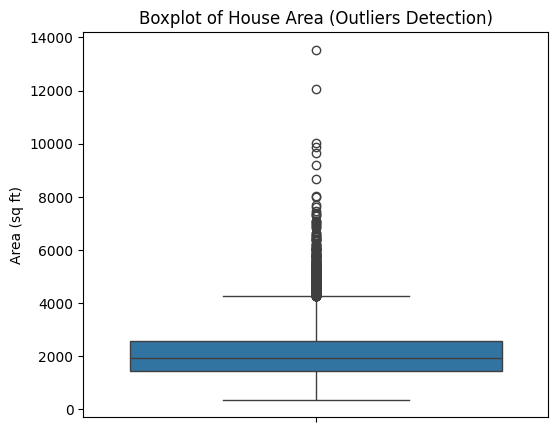

In [465]:
plt.figure(figsize=(6,5))
sns.boxplot(y=data['living area'])
plt.title("Boxplot of House Area (Outliers Detection)")
plt.ylabel("Area (sq ft)")
plt.show()


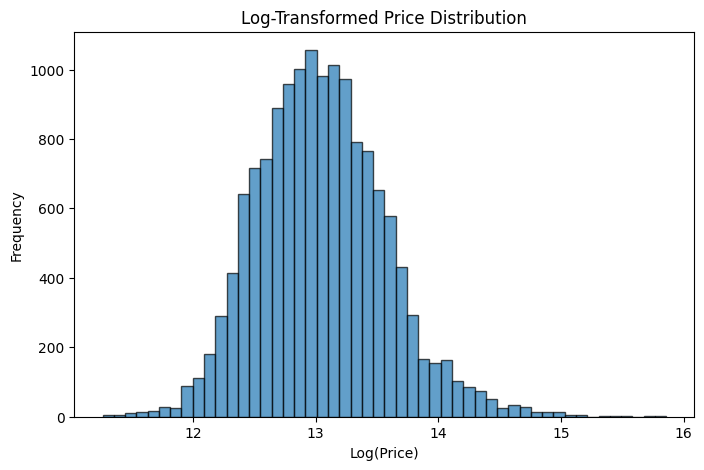

In [466]:
import numpy as np
plt.figure(figsize=(8,5))
plt.hist(np.log1p(data['Price']), bins=50, edgecolor="black", alpha=0.7)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()


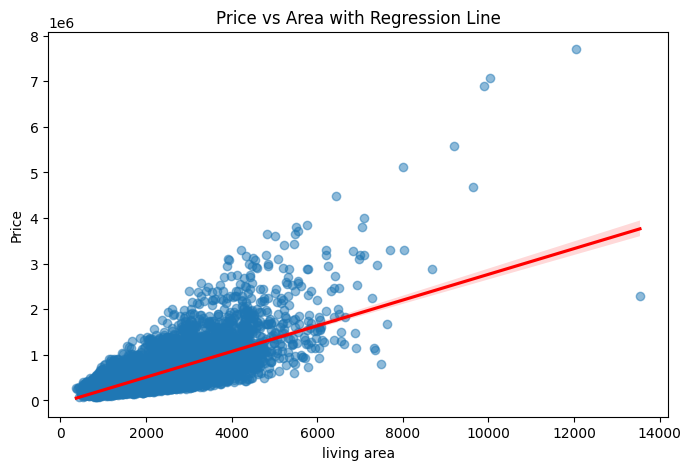

In [467]:
plt.figure(figsize=(8,5))
sns.regplot(x="living area", y="Price", data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Price vs Area with Regression Line")
plt.show()


In [468]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [469]:
data[["number of bedrooms","number of bathrooms",'Number of schools nearby']]

,number of bedrooms,number of bathrooms,Number of schools nearby
0,4,2.50,2
1,5,2.75,1
2,4,2.50,3
3,3,2.00,1
4,3,2.50,1
...,...,...,...
14614,2,1.50,3
14615,3,2.00,3
14616,2,1.00,2
14617,4,1.00,3


In [470]:
X = data[['number of bedrooms','number of bathrooms','living area','condition of the house','Number of schools nearby']]
y = data[["Price"]]

In [471]:
X

,number of bedrooms,number of bathrooms,living area,condition of the house,Number of schools nearby
0,4,2.50,2920,5,2
1,5,2.75,2910,3,1
2,4,2.50,3310,3,3
3,3,2.00,2710,4,1
4,3,2.50,2600,4,1
...,...,...,...,...,...
14614,2,1.50,1556,4,3
14615,3,2.00,1680,4,3
14616,2,1.00,1070,3,2
14617,4,1.00,1030,4,3


In [472]:
y

,Price
0,1400000
1,1200000
2,838000
3,805000
4,790000
...,...
14614,221700
14615,219200
14616,209000
14617,205000


In [473]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [474]:
print(f"\n--- Shape of original data: {data.shape} ---") 
print(f"Shape of X_train (training features): {X_train.shape}") 
print(f"Shape of X_test (testing features): {X_test.shape}") 
print(f"Shape of y_train (training target): {y_train.shape}")
print(f"Shape of y_test (testing target): {y_test.shape}") 


--- Shape of original data: (14619, 23) ---
Shape of X_train (training features): (11695, 5)
Shape of X_test (testing features): (2924, 5)
Shape of y_train (training target): (11695, 1)
Shape of y_test (testing target): (2924, 1)


In [475]:
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [476]:
parameters_grid_dt = {
    'criterion': ["squared_error", "friedman_mse","absolute_error" ],
    'splitter': ['best', 'random'],              
    'max_depth': [None, 10, 20, 30, 40, 50],     
    'min_samples_split': [2, 5, 9],             
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, "sqrt", "log2"] 
}  

In [477]:
tree_model = DecisionTreeRegressor()

In [478]:
grid_tree = GridSearchCV(estimator=tree_model, param_grid=parameters_grid_dt)

In [479]:
print("--- Training Decision Tree Regressor with GridSearchCV... ---")

grid_tree.fit(X_train, y_train)
 
print("Decision Tree Regressor training complete.")

--- Training Decision Tree Regressor with GridSearchCV... ---
Decision Tree Regressor training complete.


In [480]:
grid_tree.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'random'}

In [481]:
tree_preds = grid_tree.predict(X_test)

In [482]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tree_preds)

162266.46498710586

In [483]:
from sklearn.metrics import mean_squared_error, r2_score

In [484]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [485]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [486]:
predslr = lr.predict(X_test)

In [487]:
mean_absolute_error(y_test,predslr)

164778.76464910444

In [ ]:
mse = mean_squared_error(y_test,predslr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predslr)


In [489]:
print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
Mean Squared Error: 62103244878.01
Root Mean Squared Error: 249205.23
R² Score: 0.51


In [490]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()

In [491]:
param_gridrfr = {
    "max_depth" : [5,10,15],
    "n_estimators" : [2,3,4,5,6,7,8,9,10]
}

In [492]:
gridrfr = GridSearchCV(rfrmodel , param_gridrfr)

In [493]:
gridrfr.fit(X_train,y_train.values.ravel())

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,4


In [494]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 4}

In [495]:
rfrpredictions = gridrfr.predict(X_test)

In [496]:
mean_absolute_error(y_test,rfrpredictions)

160107.26658837832

In [497]:
gridrfr

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,4


In [498]:
import joblib
joblib.dump(gridrfr,"model.pkl")

['model.pkl']